為替レート取得

In [4]:
!pip install pandas_datareader

In [1]:
import pandas_datareader.data as pdr
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# 警告文非表示
import warnings
warnings.simplefilter('ignore')

df = pd.read_csv("usdjpy2.csv", engine = 'python')
df

Using TensorFlow backend.


,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-02,117.485001,116.724998,116.809998,116.794998,0.0,116.794998
1,2017-01-03,118.593002,117.286003,117.487999,117.495003,0.0,117.495003
2,2017-01-04,118.176003,117.068001,117.678001,117.658997,0.0,117.658997
3,2017-01-05,117.084999,115.292999,117.056000,117.112999,0.0,117.112999
4,2017-01-06,116.744003,115.263000,115.318001,115.264999,0.0,115.264999
...,...,...,...,...,...,...,...
1025,2020-12-10,104.573997,104.232002,104.287003,104.272003,0.0,104.272003
1026,2020-12-11,104.167999,103.825996,104.167999,104.181999,0.0,104.181999
1027,2020-12-14,104.083000,103.514000,103.961998,103.939003,0.0,103.939003
1028,2020-12-15,104.147003,103.681000,104.012001,104.010002,0.0,104.010002


In [2]:
df['date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df['date']

0      2017-01-02
1      2017-01-03
2      2017-01-04
3      2017-01-05
4      2017-01-06
          ...    
1025   2020-12-10
1026   2020-12-11
1027   2020-12-14
1028   2020-12-15
1029   2020-12-16
Name: date, Length: 1030, dtype: datetime64[ns]

In [3]:
df['Aclose'] = preprocessing.scale(df['Adj Close'])
df = df.loc[:, ['date', 'Aclose']]
df

,date,Aclose
0,2017-01-02,2.634892
1,2017-01-03,2.893029
2,2017-01-04,2.953504
3,2017-01-05,2.752159
4,2017-01-06,2.070682
...,...,...
1025,2020-12-10,-1.983149
1026,2020-12-11,-2.016339
1027,2020-12-14,-2.105947
1028,2020-12-15,-2.079765


### 正規化

<Figure size 864x576 with 0 Axes>

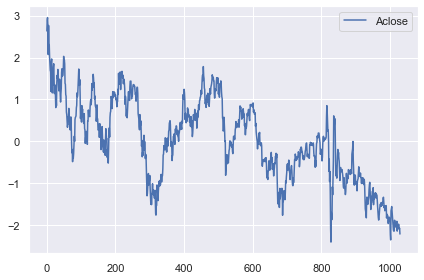

In [4]:
cols = ['Aclose']

plt.figure(figsize = (12, 8))
df[cols].plot()
plt.tight_layout()

調整後終値（Adj Close）を使用して学習モデルを構築する<br>
LSTM

In [6]:
df.dtypes

date      datetime64[ns]
Aclose           float64
dtype: object

In [5]:
X, Y = [], []

for i in range(len(df) -10):
    X.append(df[['Aclose']].iloc[i:(i + 10)].values)
    Y.append(df[['Aclose']].iloc[i + 10].values)
             
X = np.array(X)
Y = np.array(Y)

分割

In [6]:
n = int(len(X) * 0.8)

X_train, X_test = np.vsplit(X, [n])
y_train, y_test = np.vsplit(Y, [n])

In [8]:
X_train[0]

array([[2.63489186],
       [2.89302895],
       [2.95350411],
       [2.75215938],
       [2.07068208],
       [2.76580462],
       [2.33619322],
       [2.29452318],
       [2.00909841],
       [1.84905516]])

モデル作成 & 学習

In [9]:
n_in = 1
n_out = 1
n_hidden = 300

model = Sequential()
model.add(LSTM(n_hidden,
               batch_input_shape = (None,  10, n_in),
               kernel_initializer = 'random_uniform',
               return_sequences = False))

model.add(Dense(n_in, kernel_initializer = 'random_uniform'))
model.add(Activation("linear"))

opt = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)
model.compile(loss = "mean_squared_error", optimizer = opt)

In [10]:
hist = model.fit(X_train, y_train, batch_size = 10, epochs = 30)


Epoch 1/30
816/816 [==============================] - 1s 1ms/step - loss: 0.1607
Epoch 2/30
816/816 [==============================] - 1s 836us/step - loss: 0.0886
Epoch 3/30
816/816 [==============================] - 1s 741us/step - loss: 0.0635
Epoch 4/30
816/816 [==============================] - 1s 746us/step - loss: 0.0524
Epoch 5/30
816/816 [==============================] - 1s 739us/step - loss: 0.0481
Epoch 6/30
816/816 [==============================] - 1s 742us/step - loss: 0.0418
Epoch 7/30
816/816 [==============================] - 1s 740us/step - loss: 0.0389
Epoch 8/30
816/816 [==============================] - 1s 747us/step - loss: 0.0382
Epoch 9/30
816/816 [==============================] - 1s 744us/step - loss: 0.0389
Epoch 10/30
816/816 [==============================] - 1s 744us/step - loss: 0.0350
Epoch 11/30
816/816 [==============================] - 1s 742us/step - loss: 0.0342
Epoch 12/30
816/816 [==============================] - 1s 743us/step - loss: 0.0338
Ep

損失関数

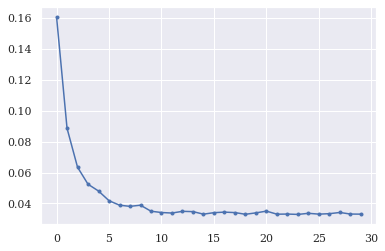

In [11]:
loss = hist.history['loss']
epochs = len(loss)
plt.rc('font', family = 'serif')
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(range(epochs), loss, marker = '.', label = 'loss(training data)')
plt.show()

予測結果

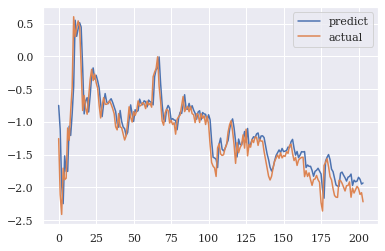

In [12]:
pred = model.predict(X_test)

result = pd.DataFrame(pred)
result.columns = ['predict']
result['actual'] = y_test
result.plot()
plt.show()

In [9]:
X_test[0]

array([[ 0.84970273],
       [ 0.70330191],
       [ 0.44516764],
       [ 0.23460322],
       [ 0.26299658],
       [ 0.00375662],
       [-0.72013066],
       [-0.42880609],
       [-0.96351401],
       [-0.72750472]])

性能評価<br>
・RMSE<br>
・決定係数

In [13]:
def rmse(pred, y_true):
    return np.sqrt(((y_true - pred) ** 2).mean())

print("RMSE :", rmse(model.predict(X_test), y_test))

from sklearn.metrics import r2_score

print("決定係数 :",r2_score(model.predict(X_test), y_test))

RMSE : 0.22278154430827254
決定係数 : 0.8226455447310195


In [14]:
import warnings
warnings.filterwarnings('ignore')
#from sklearn.externals import joblib

import joblib

joblib.dump(model, "model.pkl", compress = True)

['model.pkl']

・正規化から元に戻す<br>
・日付と終値の紐づけ　⇒　API化<br>